In [1]:
from bioinformatics import na_read as nr
#from bioinformatics import NCBIDataset as nds
from bioinformatics import FASTADataset as fads
from bioinformatics import KmerVectors as kvec

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [2]:
NGDC_PATH = "../data/bioinformatics/ngdc/"
IDOG_PATH = NGDC_PATH + "idog/"
#!ls -al $IDOG_PATH

In [3]:
dhole_cds_dataset_file = IDOG_PATH + "dhole.cds.fa"
wolfe_cds_dataset_file = IDOG_PATH + "wolf.cds.fa"
#!ls $dhole_cds_dataset_file
#!ls $wolfe_cds_dataset_file

In [4]:
dhole_cds_fads = fads.FASTADataset('dhole', dhole_cds_dataset_file)
wolfe_cds_fads = fads.FASTADataset('wolfe', wolfe_cds_dataset_file)

In [5]:
#dhole_cds_fads.fasta_dataset

In [6]:
#wolfe_cds_fads.fasta_dataset

In [5]:
kv_fasta = kvec.KmerVectors(['A','G','C','T'], 6, fastadatasets=[dhole_cds_fads,wolfe_cds_fads], verbose=True)
print(f'dictionary size: [{len(kv_fasta.dict)}]')
print(kv_fasta.labels)

KmerVectors Object -
alphabet [['A', 'G', 'C', 'T']]
dict: [['AAAAAA', 'AAAAAG', 'AAAAAC', 'AAAAAT']]...[['TTTTTA', 'TTTTTG', 'TTTTTC', 'TTTTTT']]
Labels: [{'dhole': 1, 'wolfe': 2}]
[dhole]
[../data/bioinformatics/ngdc/idog/dhole.cds.fa]
[wolfe]
[../data/bioinformatics/ngdc/idog/wolf.cds.fa]
dictionary size: [4096]
{'dhole': 1, 'wolfe': 2}


In [6]:
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1

### Bag of Words

In [7]:
df_fasta = kv_fasta.seq2KmerSentences(seq_type='fna2', base_count_max=4, length_min=500, dataset_limit=3000, verbose=True)

FASTA Dataset
seq2KmerSentencesFASTA
fasta dataset: [dhole]
100020003000capped at [3000]
-
Total:                [3554]
Using :               [3001]
skip_count_minlength: [10]
skip_count_alphabet: [544]
fasta dataset: [wolfe]
100020003000capped at [3000]
-
Total:                [3820]
Using :               [3001]
skip_count_minlength: [40]
skip_count_alphabet: [780]


In [8]:
df_fasta=pd.DataFrame(data=df_fasta)
df_fasta

,v1,v2
0,dhole,ATGGCT TGGCTC GGCTCC GCTCCG CTCCGA TCCGAT CCGA...
1,dhole,ATGCCA TGCCAG GCCAGC CCAGCT CAGCTA AGCTAA GCTA...
2,dhole,ATGGCG TGGCGG GGCGGA GCGGAC CGGACG GGACGG GACG...
3,dhole,ATGGTT TGGTTT GGTTTT GTTTTT TTTTTA TTTTAT TTTA...
4,dhole,ATGCTG TGCTGT GCTGTC CTGTCG TGTCGA GTCGAG TCGA...
...,...,...
5995,wolfe,ATGGAG TGGAGG GGAGGC GAGGCT AGGCTG GGCTGC GCTG...
5996,wolfe,ATGGCT TGGCTC GGCTCT GCTCTG CTCTGC TCTGCT CTGC...
5997,wolfe,ATGTCG TGTCGG GTCGGT TCGGTG CGGTGT GGTGTT GTGT...
5998,wolfe,ATGGCA TGGCAT GGCATG GCATGC CATGCT ATGCTA TGCT...


In [9]:
texts=df_fasta['v2']
texts

0       ATGGCT TGGCTC GGCTCC GCTCCG CTCCGA TCCGAT CCGA...
1       ATGCCA TGCCAG GCCAGC CCAGCT CAGCTA AGCTAA GCTA...
2       ATGGCG TGGCGG GGCGGA GCGGAC CGGACG GGACGG GACG...
3       ATGGTT TGGTTT GGTTTT GTTTTT TTTTTA TTTTAT TTTA...
4       ATGCTG TGCTGT GCTGTC CTGTCG TGTCGA GTCGAG TCGA...
                              ...                        
5995    ATGGAG TGGAGG GGAGGC GAGGCT AGGCTG GGCTGC GCTG...
5996    ATGGCT TGGCTC GGCTCT GCTCTG CTCTGC TCTGCT CTGC...
5997    ATGTCG TGTCGG GTCGGT TCGGTG CGGTGT GGTGTT GTGT...
5998    ATGGCA TGGCAT GGCATG GCATGC CATGCT ATGCTA TGCT...
5999    ATGCGA TGCGAC GCGACC CGACCG GACCGG ACCGGC CCGG...
Name: v2, Length: 6000, dtype: object

In [10]:
df=pd.DataFrame(data=df_fasta)
df = df_fasta.replace({"v1": kv_fasta.labels})

df

,v1,v2
0,1,ATGGCT TGGCTC GGCTCC GCTCCG CTCCGA TCCGAT CCGA...
1,1,ATGCCA TGCCAG GCCAGC CCAGCT CAGCTA AGCTAA GCTA...
2,1,ATGGCG TGGCGG GGCGGA GCGGAC CGGACG GGACGG GACG...
3,1,ATGGTT TGGTTT GGTTTT GTTTTT TTTTTA TTTTAT TTTA...
4,1,ATGCTG TGCTGT GCTGTC CTGTCG TGTCGA GTCGAG TCGA...
...,...,...
5995,2,ATGGAG TGGAGG GGAGGC GAGGCT AGGCTG GGCTGC GCTG...
5996,2,ATGGCT TGGCTC GGCTCT GCTCTG CTCTGC TCTGCT CTGC...
5997,2,ATGTCG TGTCGG GTCGGT TCGGTG CGGTGT GGTGTT GTGT...
5998,2,ATGGCA TGGCAT GGCATG GCATGC CATGCT ATGCTA TGCT...


/home/dave/anaconda3/envs/capstone/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class distribution of Dhole(1) and Wolf(2)')

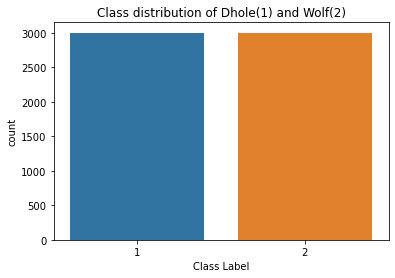

In [11]:
sns.countplot(df.v1)
plt.xlabel('Class Label')
plt.title('Class distribution of Dhole(1) and Wolf(2)')

In [12]:
y=df['v1'].values
y

array([1, 1, 1, ..., 2, 2, 2])

In [17]:
# Creating the Bag of Words model:
cv = CountVectorizer(ngram_range=(1,1), lowercase=False) #The n-gram size of 4 is previously determined by testing
X = cv.fit_transform(texts)

In [18]:
X

<6000x250227 sparse matrix of type '<class 'numpy.int64'>'
	with 2929266 stored elements in Compressed Sparse Row format>

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=42)

In [19]:
print(f'X.shape: [{X.shape}]')
print(f'len(y): [{len(y)}]')

X.shape: [(6000, 4096)]
len(y): [6000]


In [20]:
#from sklearn.naive_bayes import GaussianNB

print(f'X_train.shape: [{X_train.shape}]')
print(f'len(y_train): [{len(y_train)}]')
print(f'X_test.shape: [{X_test.shape}]')
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())

print("Confusion matrix for predictions on human test DNA sequence\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))


X_train.shape: [(4002, 4096)]
len(y_train): [4002]
X_test.shape: [(1998, 4096)]
Confusion matrix for predictions on human test DNA sequence

Predicted    1    2
Actual             
1          473  548
2          365  612
Number of mislabeled points out of a total 1998 points : 913
accuracy = 0.543 
precision = 0.546 
recall = 0.543 
f1 = 0.540


In [ ]:
#print(kv_fasta.alphabet)
#s = "GCGTAGGCCTT"
#print(all(letter in s for letter in list(kv_fasta.alphabet)))
#print(all(letter in s for letter in list(kv_fasta.alphabet)))

In [21]:
e_fasta = kv_fasta.seq2KmerEncodedNumpyVectors(base_count_max=4, length_min=500, dataset_limit=20000, verbose=True)

FASTA Dataset
seq2KmerEncodedNumpyVectorFASTA
fasta dataset: [dhole], limit: [20000]
1000200030004000500060007000800090001000011000120001300014000150001600017000180001900020000-
Total:             [20046]
Using :               [16986]
skip_count_minlength: [51]
skip_count_alphabet:  [3008]
fasta dataset: [wolfe], limit: [20000]
1000200030004000sequence:[ATGGGGNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN]
500060007000800090001000011000120001300014000150001600017000180001900020000-
Total:             [20798]
Using :               [16250]
skip_cou

In [ ]:
#df=pd.DataFrame(data=e_fasta)
#df = df_dog.replace({"v1": kv_fasta.labels})
#df.groupby('v1').count()

In [22]:
X=e_fasta[0]
X

array([[ 859, 3438, 1466, ..., 4049, 3908, 3344],
       [ 872, 3489, 1670, ..., 3725, 2615, 2269],
       [ 857, 3429, 1428, ..., 2277,  919, 3679],
       ...,
       [ 833, 3334, 1050, ..., 2482, 1738, 2857],
       [ 855, 3422, 1400, ..., 1686, 2649, 2404],
       [ 879, 3517, 1783, ..., 3746, 2696, 2595]])

In [23]:
y=e_fasta[1]
y

array([1, 1, 1, ..., 2, 2, 2])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
print(f'X_train len: [{len(X_train)}]')
print(f'y_train len: [{len(y_train)}]')

print(f'X_test len: [{len(X_test)}]')
print(f'y_test len: [{len(y_test)}]')

X_train len: [22268]
y_train len: [22268]
X_test len: [10968]
y_test len: [10968]


In [26]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 10968 points : 4903


###

In [27]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
y_pred = bnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 10968 points : 5277
